In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

Кількість пасажирів без указаного віку: 177


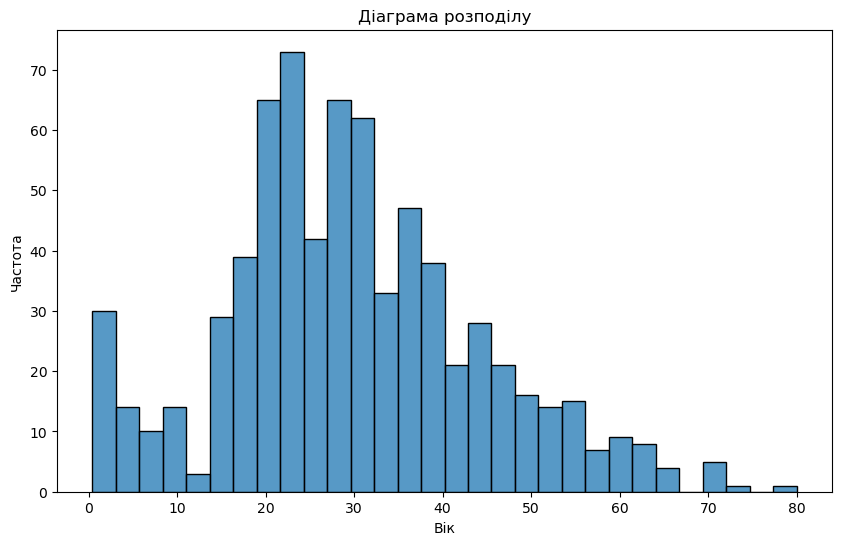

In [12]:
df = pd.read_csv('train.csv')

# Перетворення колонки 'Sex' в числову
df['Sex'] = df['Sex'].map({'male': 1, 'female': 0})

# Зприбераємо стовбці які не будемо використовувати
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

# к-сть пропущених значень в Age
print('Кількість пасажирів без указаного віку:', df['Age'].isnull().sum())

# Побудова діаграми розподілу віку перед заповненням пропущених значень
plt.figure(figsize=(10,6))
sns.histplot(df['Age'].dropna(), kde=False, bins=30)
plt.title('Діаграма розподілу')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

In [13]:
# Розділення датасету на два: один з пропущеними значеннями Age і один без них
df_with_age = df[df['Age'].notna()]
df_without_age = df[df['Age'].isna()]

X_age = df_with_age.drop('Age', axis=1)
y_age = df_with_age['Age']
X_train, X_test, y_train, y_test = train_test_split(X_age, y_age, test_size=0.2, random_state=42)

# Я вирішив створити модель випадкового лісу, яка вставляє вік на основі інших даних
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Перевірка точності
y_pred = model.predict(X_test)
print(f'В середньому модель помиляється на: {mean_absolute_error(y_test, y_pred)}')

В середньому модель помиляється на: 9.496563675819282


/var/folders/fv/4htbnq6d04q4hfws4ch0x0fm0000gn/T/ipykernel_28971/106806581.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_without_age['Age'] = model.predict(df_without_age.drop('Age', axis=1))


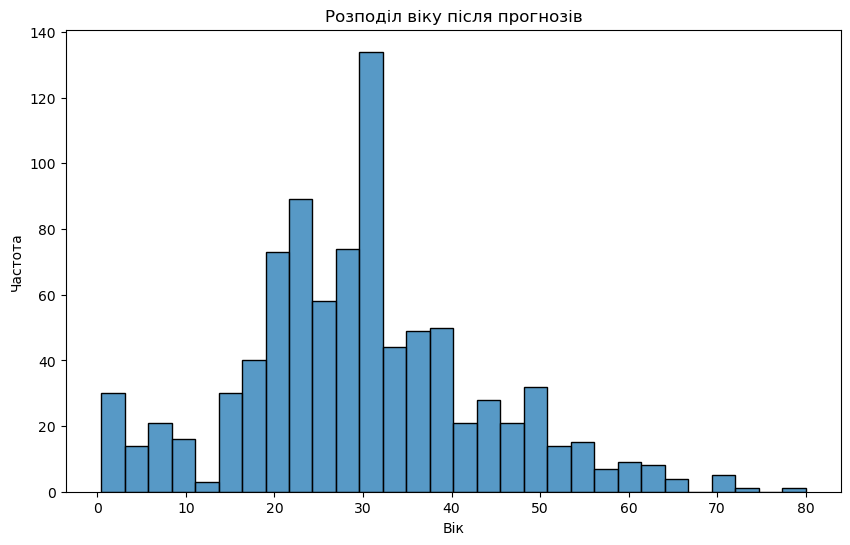

In [34]:
# Заповнення пропущених значень Age в оригінальному датасеті
df_without_age['Age'] = model.predict(df_without_age.drop('Age', axis=1))
df = pd.concat([df_with_age, df_without_age], axis=0)

df.sort_index(inplace=True)

# Побудова діаграми розподілу віку після прогнозів й заповнення
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=False, bins=30)
plt.title('Розподіл віку після заповнення моделю випадкового лісу')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

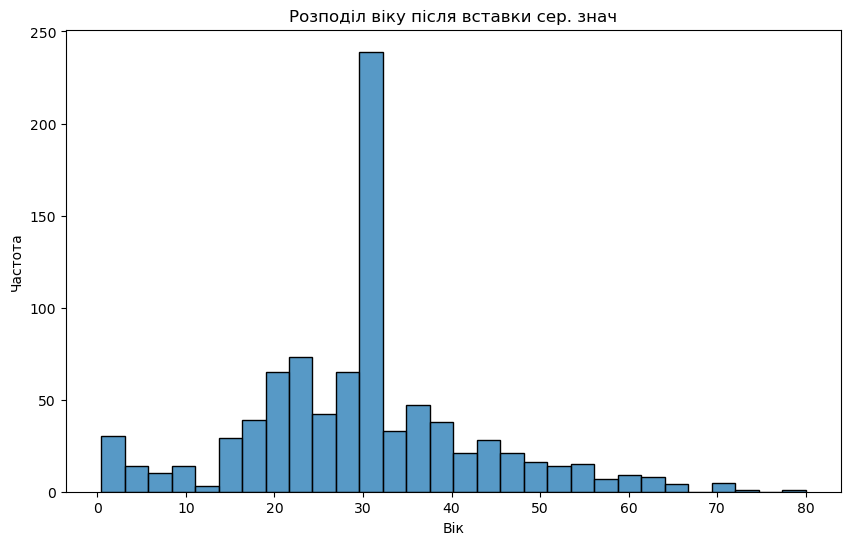

In [16]:
# Заміна віку на середне значення

df['Age'].fillna(df['Age'].mean(), inplace=True)
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], kde=False, bins=30)
plt.title('Розподіл віку після вставки сер. знач')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()
